# Programming Exercise 5: Continuous Latent Variables (Principal Component Analysis)


In [138]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt

## Problem 1 (20 pts)

The file "digit_database.zip" contains ten '.mat' files with datasets for each handwritten digit, respectively. Each
of the files contains a matrix X of size 784 x 100 so that it represents a collection of 100 images, each with
the resolution 28x28 = 784. This database was constructed from a large database of handwritten digits, called
MNIST.

### Loading Dataset



1. Choose any of the digits and load its dataset. You can use scipy.io.loadmat(filename) to load ’.mat’ files.
This function will return a dictionary, that you need to unpack.

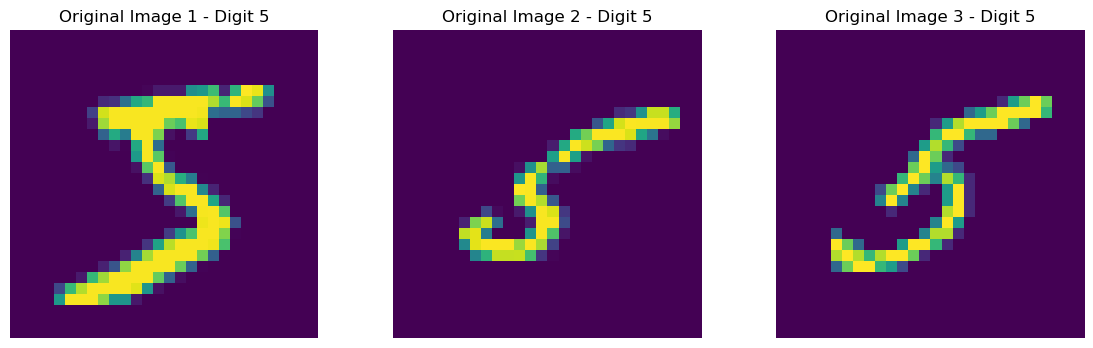

In [139]:
files = ["zeros", "ones", "twos", "threes", "fours", "fives", "sixes", "sevens", "eights", "nines"]
file_number = 5

image_dict = {}

io.loadmat(file_name="./digit_database/" + files[file_number], mdict=image_dict)

image_dataset = np.array(image_dict["X"])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

for i in range(3):
    axes[i].imshow(image_dataset[:, i].reshape(28, 28).T)
    axes[i].set_title("Original Image {} - Digit {}".format(i + 1, file_number))
    axes[i].axis("off")

plt.show()

### Principal Component Analysis Implementation

Implement the principal component analysis algorithm (see Algorithm 1) for the chosen digit. Note that
you need to sort the eigenvectors so that the corresponding eigenvalues decrease. Vary the dimension of
the linear subspace M ∈ {5, 30, 100} to observe its effect on the image compression. The reconstruction
becomes more accurate for an increasing M and would become exact when M = D

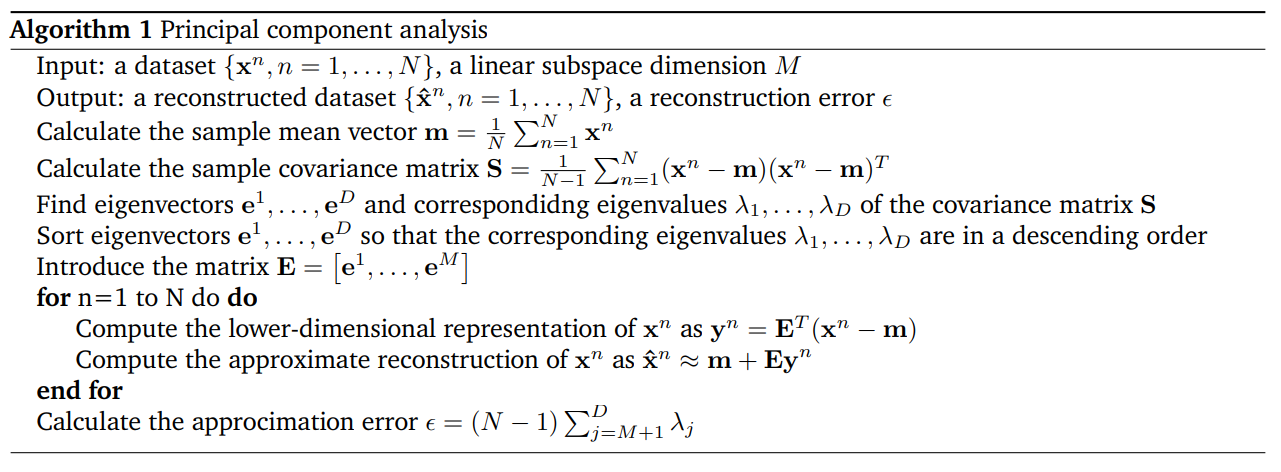

In [140]:
def PCA(dataset, M):
    num_pixels, num_samples = dataset.shape
    
    sample_mean_vector = np.mean(dataset, axis=1)
    sample_cov_matrix = np.cov(dataset, bias=False)
    
    eigenvalues, eigenvectors = np.linalg.eig(sample_cov_matrix)
    
    indices_eig_values_asc = np.argsort(eigenvalues)
    indices_eig_values_des = indices_eig_values_asc[::-1]
    
    sorted_eigenvalues = eigenvalues[indices_eig_values_des]
    sorted_eigenvectors = eigenvectors[:, indices_eig_values_des]
    
    E = sorted_eigenvectors[:, 0:M] # eigenvectors are the main components
    
    transformed_dataset = E.T @ (dataset - sample_mean_vector.reshape(num_pixels, 1)) # projection of data in the main components
    
    approx_reconstruction = sample_mean_vector.reshape(num_pixels, 1) + E @ transformed_dataset
    
    approx_error = (num_samples-1)*np.sum(sorted_eigenvalues[M:])
    
    return {
        "approx_reconstruction": approx_reconstruction.real,
        "approx_error": approx_error.real
    }

### Results

Choose five images from the dataset. Plot the pairs of those original images and the resulting reconstructed
image.

In [141]:
def generate_results(file_number):
    image_dict = {}
    io.loadmat(file_name="./digit_database/" + files[file_number], mdict=image_dict)

    image_dataset = np.array(image_dict["X"])
    
    dimensionality = [5, 30, 100]

    fig, axes = plt.subplots(nrows=3, ncols=len(dimensionality) + 1, figsize=(18,12))
    plt.subplots_adjust(bottom=0.1)

    for i in range(3):
        axes[i, 0].imshow(image_dataset[:, i].reshape(28, 28).T)
        axes[i, 0].set_title("Original Image {} - Digit {}".format(i + 1, file_number))
        axes[i, 0].axis("off")

    k = 1

    for M in dimensionality: 
        result = PCA(dataset=image_dataset, M=M)

        approx_img_dataset = result["approx_reconstruction"]
        error = result["approx_error"]
        
        for i in range(3):
            axes[i, k].imshow(approx_img_dataset[:, i].reshape(28, 28).T)
            
            axes[i, k].set_title("Reconstructed Image {} with M = {}".format(i+1, M))
            axes[i, k].axis("off")
            
            axes[i, k].text(0.5, -0.05, "Error: {:.2e}".format(error), 
            ha='center', va='center', transform=axes[i, k].transAxes)
            
        k += 1

#### Digit 5

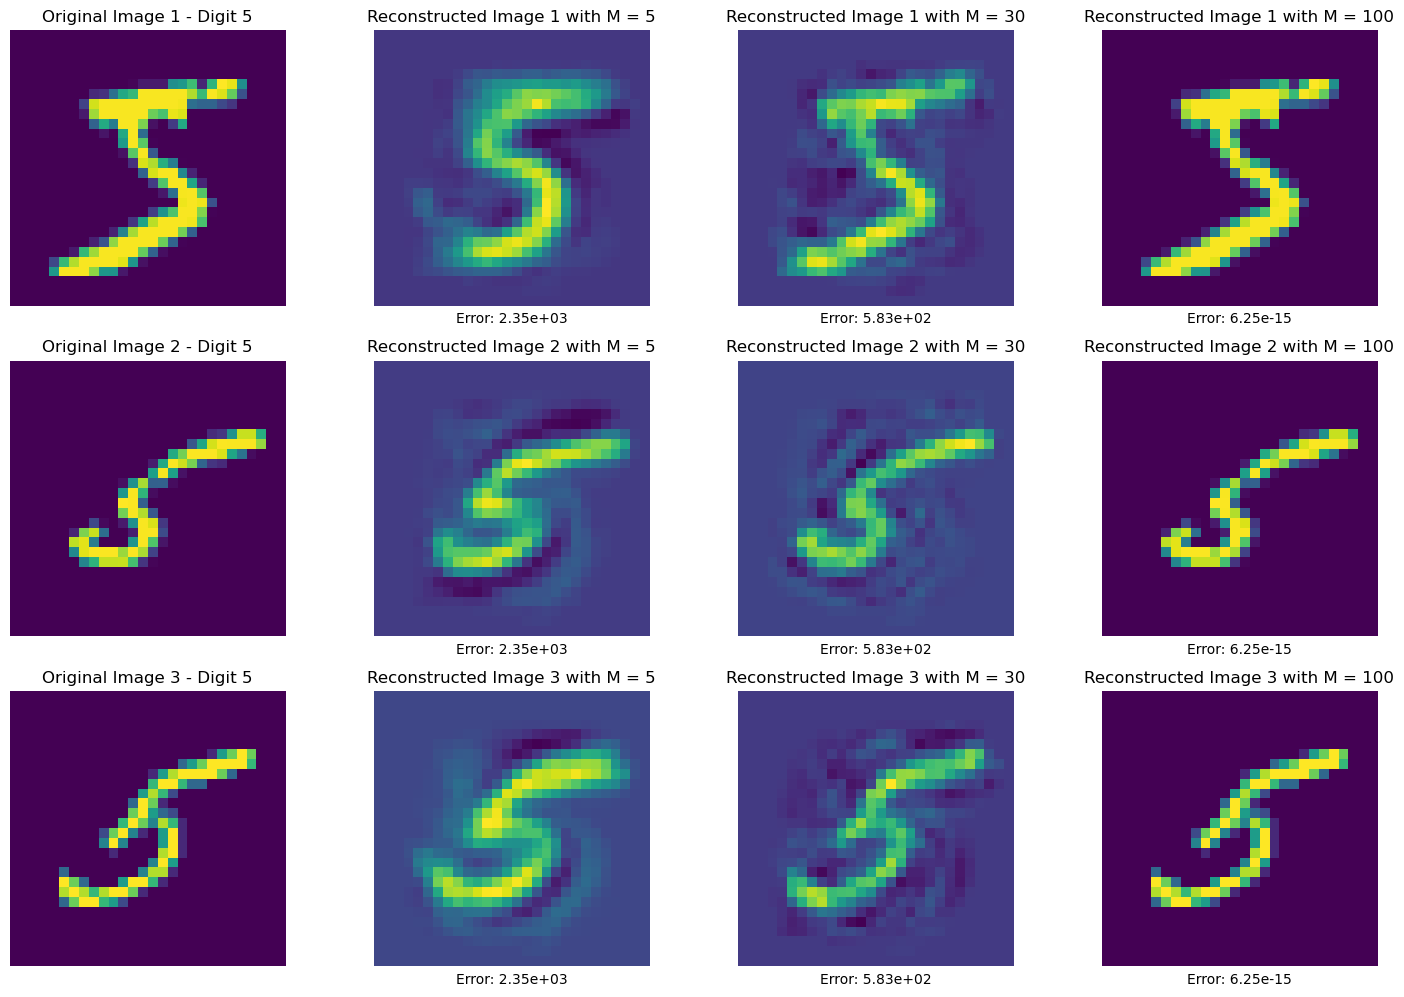

In [142]:
generate_results(5)

#### Digit 7

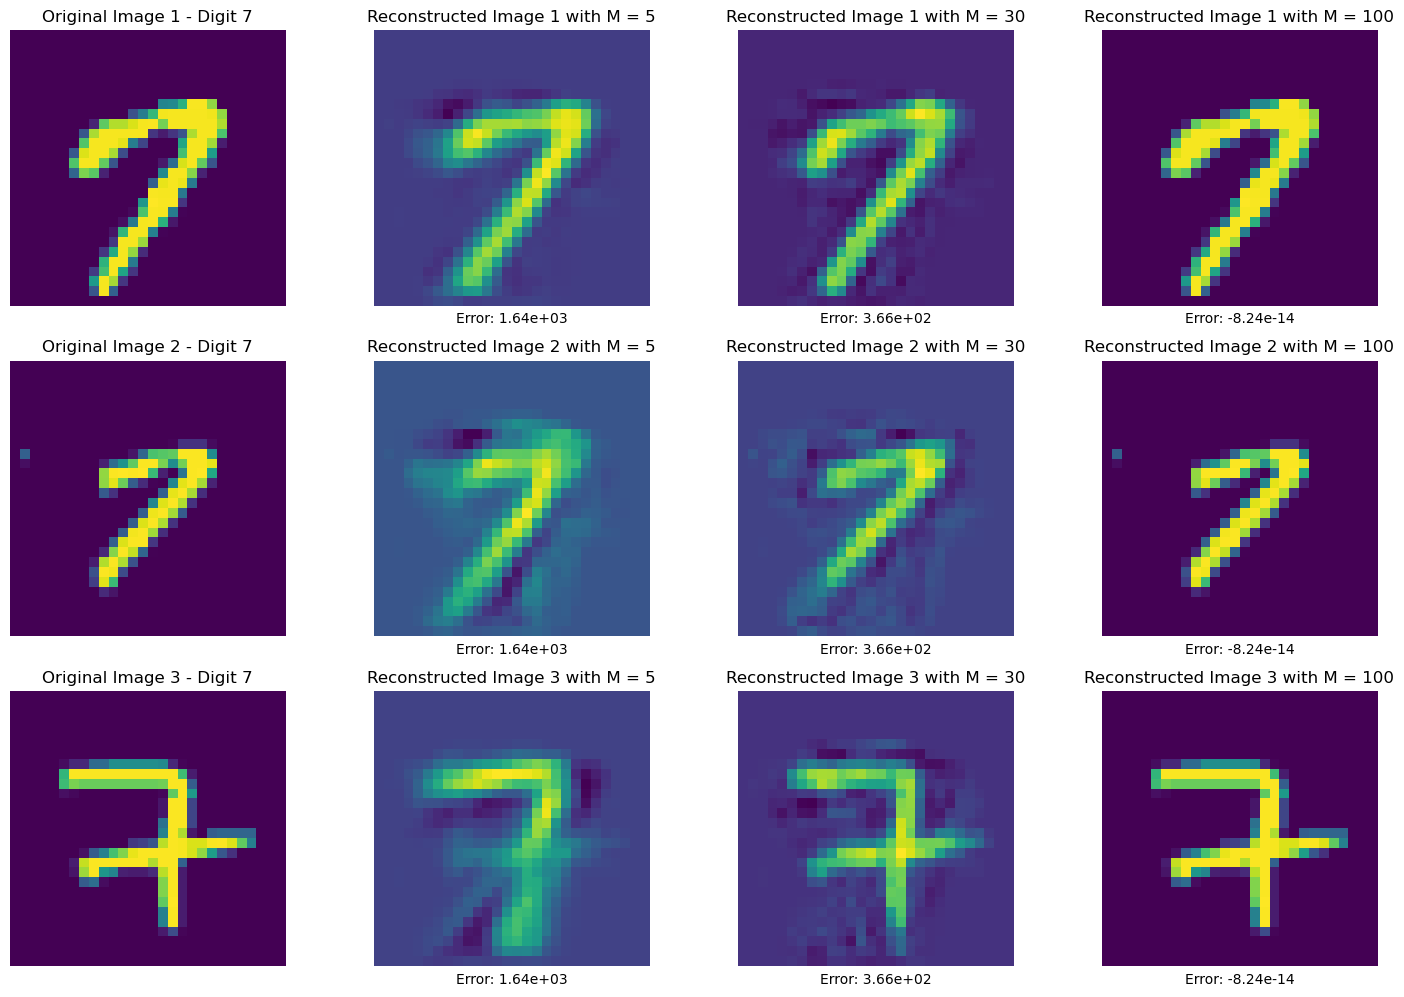

In [143]:
generate_results(7)